比赛地址：https://www.kaggle.com/c/santander-customer-satisfaction  

# 1、依赖包的导入

In [54]:
# coding:utf-8
import numpy as np  # 数学
import pandas as pd
from sklearn import datasets  #用数据库去学习，或者把数据库放到tenserflow模块练习
from sklearn.model_selection import train_test_split # 数据集测试集分离
from sklearn.neighbors import KNeighborsClassifier   # 会选择邻近几个点作为他的邻居，综合临近几个点模拟出数据的预测值
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import os
%matplotlib inline

# 2、导入数据集

In [42]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
df = pd.concat([train,test], axis=0, ignore_index=True)
df

,ID,TARGET,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,...,saldo_var44,saldo_var46,saldo_var5,saldo_var6,saldo_var8,var15,var21,var3,var36,var38
0,1,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,0.00,0.0,0.00,23,0,2,99,39205.170000
1,3,0.0,0,0,-1.0,0.0,0.0,0.0,0,0,...,0.0,0,0.00,0.0,0.00,34,0,2,3,49278.030000
2,4,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,3.00,0.0,0.00,23,0,2,99,67333.770000
3,8,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,70.62,0.0,0.00,37,0,2,2,64007.970000
4,10,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,0.00,0.0,0.00,39,0,2,1,117310.979016
5,13,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,0.00,0.0,0.00,23,0,2,99,87975.750000
6,14,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,3.00,0.0,0.00,27,0,2,3,94956.660000
7,18,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,3.00,0.0,0.00,26,0,2,2,251638.950000
8,20,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,0.00,0.0,0.00,45,0,2,99,101962.020000
9,23,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,0,3.00,0.0,0.00,25,0,2,2,356463.060000


In [31]:
df.head()

,ID,TARGET,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,...,saldo_var42,saldo_var44,saldo_var5,saldo_var6,saldo_var8,var15,var21,var3,var36,var38
0,1,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.00,0.0,0.00,0.0,0.0,23,0,2,99,39205.170000
1,3,0.0,0,0,-1.0,0.0,0.0,0.0,0,0,...,0.00,0.0,0.00,0.0,0.0,34,0,2,3,49278.030000
2,4,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,3.00,0.0,3.00,0.0,0.0,23,0,2,99,67333.770000
3,8,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,70.62,0.0,70.62,0.0,0.0,37,0,2,2,64007.970000
4,10,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,135003.00,0.0,0.00,0.0,0.0,39,0,2,1,117310.979016


In [32]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [34]:
# concat后会使列重新进行排序
df = df.reindex_axis(train.columns, axis=1)
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0


# 3、了解数据集

In [10]:
print(train.shape, test.shape, df.info())   # 可以看出都是数值型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151838 entries, 0 to 151837
Columns: 371 entries, ID to var38
dtypes: float64(116), int64(255)
memory usage: 429.8 MB
(76020, 371) (75818, 370) None


In [14]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,151838.0,7.591950e+04,4.383200e+04,1.00,37960.25,75919.500,113878.7500,1.518380e+05
TARGET,76020.0,3.956853e-02,1.949445e-01,0.00,0.00,0.000,0.0000,1.000000e+00
delta_imp_amort_var18_1y3,151838.0,1.975790e+05,4.444957e+07,0.00,0.00,0.000,0.0000,1.000000e+10
delta_imp_amort_var34_1y3,151838.0,2.634387e+05,5.132577e+07,0.00,0.00,0.000,0.0000,1.000000e+10
delta_imp_aport_var13_1y3,151838.0,4.919717e+07,6.996818e+08,-1.00,0.00,0.000,0.0000,1.000000e+10
delta_imp_aport_var17_1y3,151838.0,5.005335e+06,2.236708e+08,-1.00,0.00,0.000,0.0000,1.000000e+10
delta_imp_aport_var33_1y3,151838.0,7.244563e+05,8.511220e+07,-1.00,0.00,0.000,0.0000,1.000000e+10
delta_imp_compra_var44_1y3,151838.0,9.747231e+06,3.120544e+08,-1.00,0.00,0.000,0.0000,1.000000e+10
delta_imp_reemb_var13_1y3,151838.0,4.280878e+06,2.068592e+08,0.00,0.00,0.000,0.0000,1.000000e+10
delta_imp_reemb_var17_1y3,151838.0,2.041650e+06,1.428722e+08,-1.00,0.00,0.000,0.0000,1.000000e+10


## 3-1、缺失值

In [12]:
data = df.describe().T
data['null'] = df.shape[0] - data['count']
data['null'].unique()    # 刚好是测试集种的TARGET，即没有缺失值

array([    0., 75818.])

## 3-2、异常值

# 4、删除无用的特征
## 4-1、remove constant columns (std = 0)
特征中值方差为0即当前特征无效

In [43]:
remove = []
for col in df.columns:
    if df[col].std() == 0:
        remove.append(col)

df.drop(remove, axis=1, inplace=True)  # inplace直接在源df中进行删除

In [44]:
df.shape     # 删除了接近40列

(151838, 337)

## 4-2、remove duplicated columns
这个操作一般也不会出现：删除相同的两列，并保留一列

In [45]:
remove = []
cols = df.columns
for i in range(len(cols)-1):   # j要进行i+1
    v = df[cols[i]].values
    for j in range(i+1, len(cols)):
        if np.array_equal(v, df[cols[j]].values):
            remove.append(cols[j])

df.drop(remove, axis=1, inplace=True)

In [46]:
df.shape   # 居然又删除20多列

(151838, 310)

In [50]:
df.head()

,ID,TARGET,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,...,saldo_var40,saldo_var42,saldo_var44,saldo_var5,saldo_var8,var15,var21,var3,var36,var38
0,1,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.00,0.0,0.00,0.0,23,0,2,99,39205.170000
1,3,0.0,0,0,-1.0,0.0,0.0,0.0,0,0,...,0.0,0.00,0.0,0.00,0.0,34,0,2,3,49278.030000
2,4,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,3.00,0.0,3.00,0.0,23,0,2,99,67333.770000
3,8,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,70.62,0.0,70.62,0.0,37,0,2,2,64007.970000
4,10,0.0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.0,135003.00,0.0,0.00,0.0,39,0,2,1,117310.979016


# 5、分离训练集和测试集直接训练
split data into train and test

In [65]:
df.drop('ID', axis=1, inplace=True)
testId = test.ID
y = train.TARGET.values

x = df[df['TARGET'].notnull()]
x.drop('TARGET', axis=1, inplace=True)
cols = x.columns
x = x.values    # 加values是要转换成数组。好像弄成dataframe也行

test = df[df['TARGET'].isnull()]
test.drop('TARGET', axis=1, inplace=True)
test = test.values  

# 6、K叉验证

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=520)
print(x_train.shape, x_test.shape, test.shape)

(60816, 308) (15204, 308) (75818, 308)


# 7、模型训练

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier(random_state=520).fit(x_train, y_train)

## 训练误差

In [75]:
print(cross_val_score(ET, x_train, y_train).mean()) 

0.9509504036524766


## 测试误差

In [76]:
print(cross_val_score(ET, x_test, y_test).mean()) 

0.9485661667982109


# 8、森林有feature_importances_函数
plot most important features

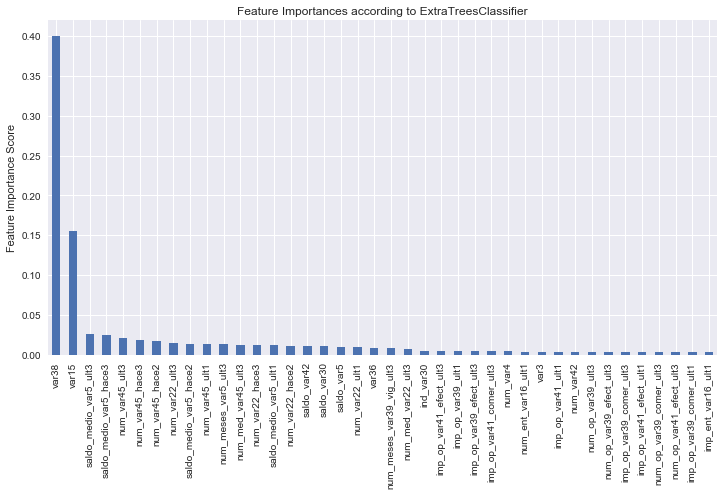

In [67]:
feat_imp = pd.Series(clf.feature_importances_, index=cols.values).sort_values(ascending=False)
feat_imp[:40].plot(kind='bar', title='Feature Importances according to ExtraTreesClassifier', figsize=(12, 8))
plt.ylabel('Feature Importance Score')
plt.subplots_adjust(bottom=0.3)
plt.savefig('FeatureImportances.png')
plt.show()

# 9、特征选择

In [69]:
from sklearn.feature_selection import SelectFromModel

fs = SelectFromModel(ET, prefit=True)
x_train = fs.transform(x_train)
x_test = fs.transform(x_test)
test = fs.transform(test)

print(x_train.shape, x_test.shape, test.shape)

(60816, 40) (15204, 40) (75818, 40)


# 10、使用XGB模型训练

In [71]:
import xgboost as xgb

XGB = xgb.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 4, seed=520).fit(x_train, y_train, eval_metric="auc", verbose = False,
           eval_set=[(x_test, y_test)])

# 11、评价模型
calculate the auc score

In [74]:
from sklearn.metrics import roc_auc_score
print("Roc AUC: ", roc_auc_score(y_test, XGB.predict_proba(x_test)[:,1], average='macro'))

Roc AUC:  0.8362389656415409


## 训练误差

In [77]:
print(cross_val_score(XGB, x_train, y_train).mean()) 

0.9610957609650178


## 测试误差

In [78]:
print(cross_val_score(XGB, x_test, y_test).mean()) 

0.957576953433307


可以看出特征选择后效果更好。

# 12、提交结果

In [80]:
res = XGB.predict_proba(test)

import datetime

now = datetime.datetime.now()
now = now.strftime('%m-%d-%H-%M')

res = pd.DataFrame({
        'ID': testId,
        'TARGET': res[:, 1]
        })
res.to_csv("./result/XGB_%s.csv" % now, index=False)
print('done!')

done!
